# Pegase grid: comparing the power flow results between MATPOWER and pandapower (Work in progress!)

In [11]:
from main import *
import pandapower.networks
import matplotlib.pyplot as plt

In [3]:
os.chdir("..")

In [4]:
net = pp.converter.from_mpc(os.path.join("reference-matpower", "case9241pegase", "case9241pegase.mat"))

15:19:16 pandapower.converter.pypower.from_ppc INFO p_mw of gen 0 must be less than zero but is not.
15:19:16 pandapower.converter.pypower.from_ppc INFO p_mw of gen 9 must be less than zero but is not.
15:19:16 pandapower.converter.pypower.from_ppc INFO p_mw of gen 14 must be less than zero but is not.
15:19:16 pandapower.converter.pypower.from_ppc INFO p_mw of gen 16 must be less than zero but is not.
15:19:16 pandapower.converter.pypower.from_ppc INFO p_mw of gen 18 must be less than zero but is not.
15:19:16 pandapower.converter.pypower.from_ppc INFO p_mw of gen 20 must be less than zero but is not.
15:19:16 pandapower.converter.pypower.from_ppc INFO p_mw of gen 27 must be less than zero but is not.
15:19:16 pandapower.converter.pypower.from_ppc INFO p_mw of gen 31 must be less than zero but is not.
15:19:16 pandapower.converter.pypower.from_ppc INFO p_mw of gen 32 must be less than zero but is not.
15:19:16 pandapower.converter.pypower.from_ppc INFO p_mw of gen 34 must be less than

15:19:18 pandapower.converter.pypower.from_ppc INFO p_mw of gen 393 must be less than zero but is not.
15:19:18 pandapower.converter.pypower.from_ppc INFO p_mw of gen 395 must be less than zero but is not.
15:19:18 pandapower.converter.pypower.from_ppc INFO p_mw of gen 397 must be less than zero but is not.
15:19:18 pandapower.converter.pypower.from_ppc INFO p_mw of gen 400 must be less than zero but is not.
15:19:18 pandapower.converter.pypower.from_ppc INFO p_mw of gen 402 must be less than zero but is not.
15:19:18 pandapower.converter.pypower.from_ppc INFO p_mw of gen 407 must be less than zero but is not.
15:19:18 pandapower.converter.pypower.from_ppc INFO p_mw of gen 418 must be less than zero but is not.
15:19:18 pandapower.converter.pypower.from_ppc INFO p_mw of gen 421 must be less than zero but is not.
15:19:18 pandapower.converter.pypower.from_ppc INFO p_mw of gen 432 must be less than zero but is not.
15:19:18 pandapower.converter.pypower.from_ppc INFO p_mw of gen 433 must 

15:19:19 pandapower.converter.pypower.from_ppc INFO p_mw of gen 735 must be less than zero but is not.
15:19:19 pandapower.converter.pypower.from_ppc INFO p_mw of gen 739 must be less than zero but is not.
15:19:19 pandapower.converter.pypower.from_ppc INFO p_mw of gen 741 must be less than zero but is not.
15:19:19 pandapower.converter.pypower.from_ppc INFO p_mw of gen 743 must be less than zero but is not.
15:19:19 pandapower.converter.pypower.from_ppc INFO p_mw of gen 750 must be less than zero but is not.
15:19:19 pandapower.converter.pypower.from_ppc INFO p_mw of gen 751 must be less than zero but is not.
15:19:19 pandapower.converter.pypower.from_ppc INFO p_mw of gen 755 must be less than zero but is not.
15:19:19 pandapower.converter.pypower.from_ppc INFO p_mw of gen 757 must be less than zero but is not.
15:19:19 pandapower.converter.pypower.from_ppc INFO p_mw of gen 759 must be less than zero but is not.
15:19:19 pandapower.converter.pypower.from_ppc INFO p_mw of gen 763 must 

15:19:21 pandapower.converter.pypower.from_ppc INFO p_mw of gen 1191 must be less than zero but is not.
15:19:21 pandapower.converter.pypower.from_ppc INFO p_mw of gen 1193 must be less than zero but is not.
15:19:21 pandapower.converter.pypower.from_ppc INFO p_mw of gen 1199 must be less than zero but is not.
15:19:21 pandapower.converter.pypower.from_ppc INFO p_mw of gen 1207 must be less than zero but is not.
15:19:21 pandapower.converter.pypower.from_ppc INFO p_mw of gen 1209 must be less than zero but is not.
15:19:21 pandapower.converter.pypower.from_ppc INFO p_mw of gen 1212 must be less than zero but is not.
15:19:21 pandapower.converter.pypower.from_ppc INFO p_mw of gen 1214 must be less than zero but is not.
15:19:21 pandapower.converter.pypower.from_ppc INFO p_mw of gen 1219 must be less than zero but is not.
15:19:21 pandapower.converter.pypower.from_ppc INFO p_mw of gen 1221 must be less than zero but is not.
15:19:21 pandapower.converter.pypower.from_ppc INFO p_mw of gen 

In [4]:
net.bus.name = net.bus.name.astype(int) + 1

In [9]:
net_mpc = net.deepcopy()

In [12]:
net = pp.networks.case9241pegase()

In [15]:
pp.runpp(net)

# Bus voltages

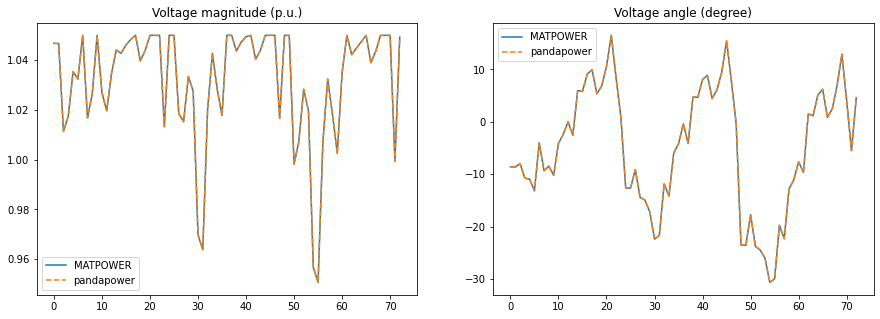

In [6]:
resbus = pd.read_csv(os.path.join("reference-matpower", "case9241pegase", "results", "resbus.csv"), header=None)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
resbus[7].plot(ax=ax1, label="MATPOWER")
net.res_bus.vm_pu.plot(ax=ax1, linestyle="--", label="pandapower")
resbus[8].plot(ax=ax2, label="MATPOWER")
net.res_bus.va_degree.plot(ax=ax2, linestyle="--", label="pandapower")
ax1.set_title("Voltage magnitude (p.u.)")
ax2.set_title("Voltage angle (degree)")
ax1.legend()
ax2.legend()

# Bus voltages (old reference file)

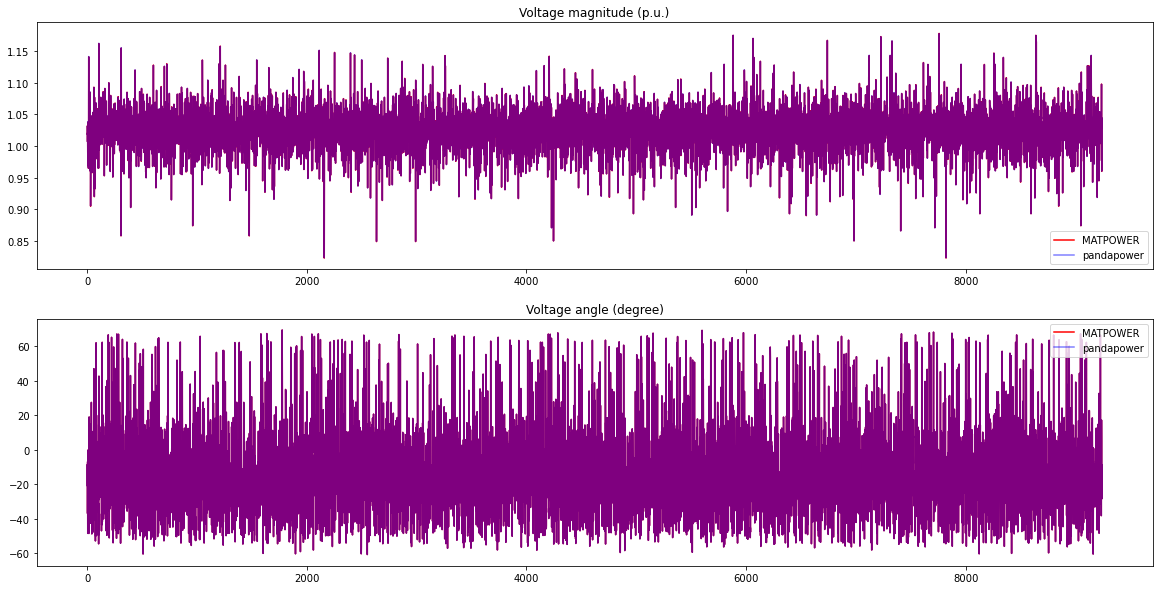

In [24]:
resbus_old = pd.read_csv(os.path.join("reference-matpower", "case9241pegase", "results", "bus.csv"))
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))
resbus_old["v_mag"].plot(ax=ax1, label="MATPOWER", color='r')
net.res_bus.vm_pu.plot(ax=ax1, alpha=0.5, label="pandapower", color='b')
#ax2.plot(np.rad2deg(resbus_old["v_ang"]), label="MATPOWER")
ax2.plot(resbus_old["v_ang"], label="MATPOWER", color='r')
net.res_bus.va_degree.plot(ax=ax2, alpha=0.5, label="pandapower", color='b')
ax1.set_title("Voltage magnitude (p.u.)")
ax2.set_title("Voltage angle (degree)")
ax1.legend()
ax2.legend()

# Line power injections

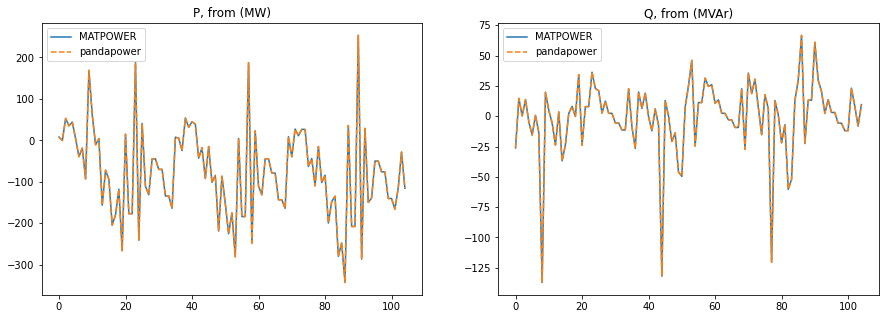

In [8]:
resline = pd.read_csv(os.path.join("reference-matpower", "case9241pegase", "results", "resline.csv"), header=None)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
resline[13].plot(ax=ax1, label="MATPOWER")
net.res_line.p_from_mw.plot(ax=ax1, linestyle="--", label="pandapower")
resline[14].plot(ax=ax2, label="MATPOWER")
net.res_line.q_from_mvar.plot(ax=ax2, linestyle="--", label="pandapower")
ax1.set_title("P, from (MW)")
ax2.set_title("Q, from (MVAr)")
ax1.legend()
ax2.legend()

# Transformer power injections

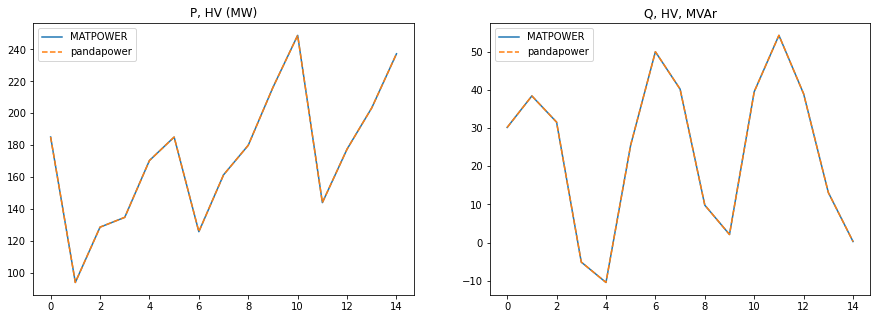

In [9]:
restrafo = pd.read_csv(os.path.join("reference-matpower", "case9241pegase", "results", "restrafo.csv"), header=None)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
restrafo[15].plot(ax=ax1, label="MATPOWER")
net.res_trafo.p_hv_mw.plot(ax=ax1, linestyle="--", label="pandapower")
restrafo[16].plot(ax=ax2, label="MATPOWER")
net.res_trafo.q_hv_mvar.plot(ax=ax2, linestyle="--", label="pandapower")
ax1.set_title("P, HV (MW)")
ax2.set_title("Q, HV, MVAr")
ax1.legend()
ax2.legend()